# This code is to test XGBoosting parameters based on sucessful implementation

Now attempting to play around with parameters to reduce error.

This is done by changing the objective. This has been done for a number of different objectives and then compared. 

Types:
Squared error - regression with squared loss
Squared log error - regression with squared log loss. 
logistic - logistic regression
pseudohubererror - regression with Pseudo Huber loss, a twice differentiable alternative to absolute loss.

For 100 trees: Type, Mean Absolute Error, STD - 7.118
reg:squarederror - 0.375
reg:squaredlogerror - 0.387
reg:pseudohubererror - 0.453

pseudo is worse as it takes greater account of the error which is already quite large.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets


In [3]:
import xgboost as xgb
from xgboost import XGBRegressor

In [4]:
nutrition_test = pd.read_csv("Test_20.csv")
nutrition_train = pd.read_csv("Train_80.csv")
nutrition_test = nutrition_test.dropna()
nutrition_train = nutrition_train.dropna()
nutrition_train

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg),Price per Weight (£/100Gram),GHG(kgco3eq/100g)
0,52.0,0.17,0.26,13.81,10.39,2.4,0.028,6.0,0.12,107.0,...,29.0,7.0,51.0,0.0,0.0,0.0,0.0,0.0,0.364706,0.0357
1,19.0,0.20,0.72,3.71,2.61,1.1,0.176,24.0,0.29,250.0,...,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0750
2,17.0,0.32,1.21,3.11,2.50,1.0,0.084,16.0,0.37,261.0,...,2125.0,11.0,91.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0455
3,62.0,0.00,0.42,15.00,13.75,0.0,0.000,0.0,0.00,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.433333,0.5752
4,412.0,10.38,9.66,74.67,24.63,9.4,1.120,101.0,2.69,501.0,...,114.0,5870.0,2390.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.0988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,884.0,100.00,0.00,0.00,0.00,0.0,13.808,1.0,0.56,1.0,...,0.0,72961.0,10523.0,0.0,0.0,0.0,0.0,0.0,0.772222,0.5944
829,350.0,34.44,6.15,5.52,3.76,0.0,20.213,97.0,0.11,132.0,...,7.0,8907.0,1483.0,10.0,20.0,0.0,0.0,0.0,0.400000,2.1240
830,35.0,1.49,2.92,4.42,0.99,4.1,0.178,254.0,1.60,348.0,...,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0,0.344444,0.0437
831,29.0,0.37,0.91,6.50,4.12,2.8,0.092,12.0,0.25,248.0,...,861.0,29.0,112.0,0.0,0.0,0.0,0.0,0.0,0.767442,0.0455


In [5]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X_train = nutrition_train.iloc[:,:40]
X_test = nutrition_test.iloc[:,:40]

#extracting the price
y_test = nutrition_test.iloc[:,40:41]
y_train = nutrition_train.iloc[:,40:41]
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

## Implementing XGBoost model 

In [6]:
# Define the parameters of our gradient boosting ensemble 
model = XGBRegressor(eta = 0.31, n_estimators=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.31, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.310000002, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
y_pred = model.predict(X_test)

In [8]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42237639016417583
Mean Squared Error: 0.39579303858569936
Root Mean Squared Error: 0.6291208457726539


In [14]:
print(np.std(y_test))

0.6675257050255079


In [163]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [164]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 100, 2):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    

ValueError: x and y must have same first dimension, but have shapes (450,) and (500,)

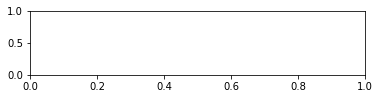

In [165]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 1000, 2))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()

In [167]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBRegressor()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

In [168]:
model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

NameError: name 'algorithm_pipeline' is not defined